In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/polynomial-regression/Ice_cream selling data.csv


In [2]:
filepath="/kaggle/input/polynomial-regression/Ice_cream selling data.csv"

In [3]:
df=pd.read_csv(filepath)

In [4]:
df.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [5]:
df.shape

(49, 2)

In [6]:
df.isna().sum()

Temperature (°C)           0
Ice Cream Sales (units)    0
dtype: int64

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df.columns

Index(['Temperature (°C)', 'Ice Cream Sales (units)'], dtype='object')

<Axes: xlabel='Temperature (°C)', ylabel='Ice Cream Sales (units)'>

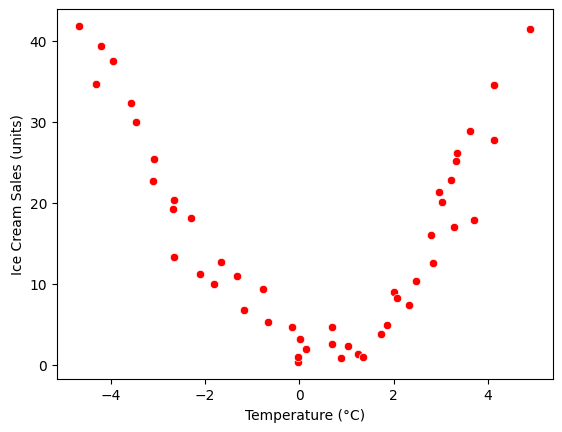

In [9]:
sns.scatterplot(x="Temperature (°C)",y="Ice Cream Sales (units)",data=df,color="red")

In [10]:
train_input=df[["Temperature (°C)"]]
train_output=df[["Ice Cream Sales (units)"]]

In [11]:
train_output

,Ice Cream Sales (units)
0,41.842986
1,34.661120
2,39.383001
3,37.539845
4,32.284531
5,30.001138
6,22.635401
7,25.365022
8,19.226970
9,20.279679


In [12]:
train_output.head()

,Ice Cream Sales (units)
0,41.842986
1,34.661120
2,39.383001
3,37.539845
4,32.284531


In [13]:
train_input.shape

(49, 1)

In [14]:
np.array(train_input).flatten()

array([-4.66226268, -4.31655945, -4.21398476, -3.94966109, -3.57855372,
       -3.4557117 , -3.10844012, -3.08130332, -2.67246083, -2.65228679,
       -2.65149803, -2.288264  , -2.11186969, -1.81893761, -1.66034773,
       -1.32637898, -1.17312327, -0.77333004, -0.6737528 , -0.14963487,
       -0.0361565 , -0.03389529,  0.0086077 ,  0.14924457,  0.68878091,
        0.69359887,  0.87490503,  1.02418081,  1.24071162,  1.35981267,
        1.74000001,  1.85055193,  1.99931037,  2.0751006 ,  2.31859124,
        2.471946  ,  2.78483646,  2.83176021,  2.95993209,  3.02087431,
        3.21136614,  3.27004407,  3.31607252,  3.33593241,  3.61077848,
        3.70405744,  4.13086796,  4.13353379,  4.89903151])

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [16]:
lr=LinearRegression()
lr.fit(train_input,train_output)

LinearRegression()

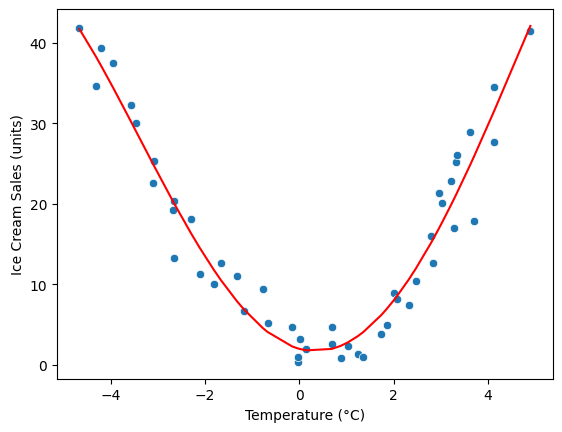

In [17]:
    plr=PolynomialFeatures(degree=4)
    poly=plr.fit_transform(train_input)
    #print(poly[:5])
    lr.fit(poly,train_output)
    predictions=np.array(lr.predict(poly),ndmin=2)
    sns.scatterplot(x="Temperature (°C)",y="Ice Cream Sales (units)",data=df)
    #sns.lineplot(x=np.array(train_input).flatten(),y=np.array(predictions).flatten())
    plt.plot(train_input,predictions,color="red")
    